In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
df = pd.read_csv("/content/datathon.csv")

In [ ]:
df = df.dropna()

In [ ]:
X = df[["VEHS(ALL)_1", "SPEEDAVGARITH(ALL)_1", "QUEUEDELAY(ALL)_1"]]
y = df["OCCUPRATE(ALL)_1"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1)  # Output layer for regression
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [ ]:
history = model.fit(X_train, y_train, epochs=40, batch_size=16, validation_data=(X_test, y_test), verbose=1)

Epoch 1/40
999/999 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0122 - mae: 0.0554 - val_loss: 7.5497e-04 - val_mae: 0.0197
Epoch 2/40
999/999 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 7.2034e-04 - mae: 0.0189 - val_loss: 5.3917e-04 - val_mae: 0.0166
Epoch 3/40
999/999 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 6.1895e-04 - mae: 0.0177 - val_loss: 4.5210e-04 - val_mae: 0.0159
Epoch 4/40
999/999 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 5.0307e-04 - mae: 0.0165 - val_loss: 4.0493e-04 - val_mae: 0.0150
Epoch 5/40
999/999 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 4.4902e-04 - mae: 0.0157 - val_loss: 5.1328e-04 - val_mae: 0.0166
Epoch 6/40
999/999 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 4.5032e-04 - mae: 0.0158 - val_loss: 4.0886e-04 - val_mae: 0.0148
Epoch 7/40
999/999 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 4.4836e-04 - mae: 0.0157 - val_loss: 4.5827e-04 - val_mae: 0.0159
Epoch 8/40
999/999 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 4.3523e-04 - mae: 0.0154 - val_loss: 4.4403e-04 - val_mae: 0.0

In [ ]:
y_pred = model.predict(X_test).flatten()

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
r2 = r2_score(y_test, y_pred)

In [ ]:
# print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")


R-squared Score: 0.9658092149462558


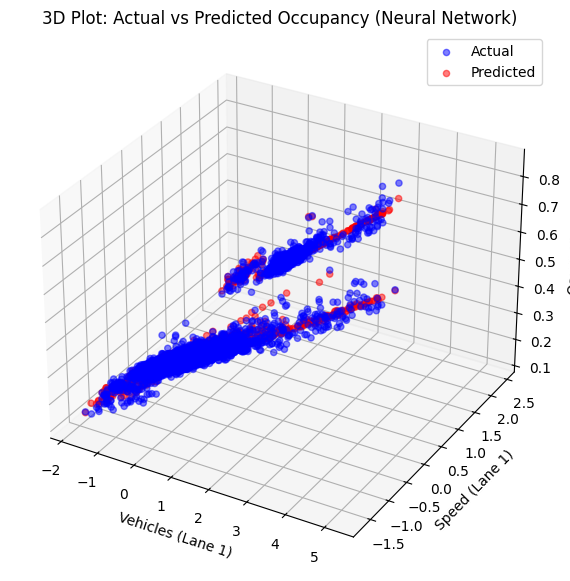

In [ ]:
# 3D Visualization
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test[:, 0], X_test[:, 1], y_test, color='blue', alpha=0.5, label='Actual')
ax.scatter(X_test[:, 0], X_test[:, 1], y_pred, color='red', alpha=0.5, label='Predicted')
ax.set_xlabel("Vehicles (Lane 1)")
ax.set_ylabel("Speed (Lane 1)")
ax.set_zlabel("Occupancy")
ax.set_title("3D Plot: Actual vs Predicted Occupancy (Neural Network)")
ax.legend()
plt.show()